<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-正则线性模型" data-toc-modified-id="1.-正则线性模型-1">1. 正则线性模型</a></span><ul class="toc-item"><li><span><a href="#1.1-Ridge-Regression（L2）" data-toc-modified-id="1.1-Ridge-Regression（L2）-1.1">1.1 Ridge Regression（L2）</a></span><ul class="toc-item"><li><span><a href="#1.1.1-Sklearn-实现" data-toc-modified-id="1.1.1-Sklearn-实现-1.1.1">1.1.1 Sklearn 实现</a></span></li><li><span><a href="#1.1.2-Ridge-+-SDG" data-toc-modified-id="1.1.2-Ridge-+-SDG-1.1.2">1.1.2 Ridge + SDG</a></span><ul class="toc-item"><li><span><a href="#1.1.2.1-Sklearn-实现" data-toc-modified-id="1.1.2.1-Sklearn-实现-1.1.2.1">1.1.2.1 Sklearn 实现</a></span></li></ul></li></ul></li><li><span><a href="#1.2-Lasso-Regression（L1）" data-toc-modified-id="1.2-Lasso-Regression（L1）-1.2">1.2 Lasso Regression（L1）</a></span><ul class="toc-item"><li><span><a href="#1.2.1-Sklearn-实现" data-toc-modified-id="1.2.1-Sklearn-实现-1.2.1">1.2.1 Sklearn 实现</a></span></li><li><span><a href="#1.2.2-Lasso-+-SGD" data-toc-modified-id="1.2.2-Lasso-+-SGD-1.2.2">1.2.2 Lasso + SGD</a></span><ul class="toc-item"><li><span><a href="#1.2.2.1-Sklearn-实现" data-toc-modified-id="1.2.2.1-Sklearn-实现-1.2.2.1">1.2.2.1 Sklearn 实现</a></span></li></ul></li></ul></li><li><span><a href="#1.3-Elastic-Net（L1&amp;L2）" data-toc-modified-id="1.3-Elastic-Net（L1&amp;L2）-1.3">1.3 Elastic Net（L1&amp;L2）</a></span><ul class="toc-item"><li><span><a href="#1.3.1-Sklearn-实现" data-toc-modified-id="1.3.1-Sklearn-实现-1.3.1">1.3.1 Sklearn 实现</a></span></li></ul></li><li><span><a href="#1.4-正则线性模型选择" data-toc-modified-id="1.4-正则线性模型选择-1.4">1.4 正则线性模型选择</a></span></li></ul></li><li><span><a href="#参考资料" data-toc-modified-id="参考资料-2">参考资料</a></span></li></ul></div>

相关文章：

[机器学习 | 目录](https://blog.csdn.net/weixin_45488228/article/details/99691709)

[机器学习 | 回归评估指标](https://blog.csdn.net/weixin_45488228/article/details/98897061)

[机器学习 | 梯度下降原理及Python实现](https://blog.csdn.net/weixin_45488228/article/details/99506171)

[监督学习 | 线性回归 之多元线性回归原理及Sklearn实现](https://blog.csdn.net/weixin_45488228/article/details/99345417)

[监督学习 | 非线性回归 之多项式回归原理及Sklearn实现](https://blog.csdn.net/weixin_45488228/article/details/100068461)

# 1. 正则线性模型


在介绍正则线性模型（Regularized Linear Models）前，我们先来看一下一个例子，假设对于以下数据，我们分别使用多元线性回归和多项式回归进行拟合分类如下：

<img style="float:center" src="https://x1a-alioss.oss-cn-shenzhen.aliyuncs.com/IMG_6876345CB261-1.jpeg" width="520" >

<center> 图1 不同模型对数据的拟合</center>

可以看到此时线性模型的错误分类点数为2，而多项式回归模型的误差为0，因此此时计算机将会选择第二个模型。但是这个模型有一个缺点，那就是过拟合了，但如何让计算机避免过拟合呢，一个常见的方法就是对模型正则化，它拥有的自由度越低，就越不容易过度拟合。比如，将多项式模型正则化的简单方法就是降低多项式的阶数。

对线性模型来说，正则化通常通过约束模型的权重来实现。如刚才的例子，如果我们为模型的成本函数添加一个模型复杂度的话，就可以在挑选模型的时候考虑到模型的复杂度。

按照对模型复杂度的惩罚不同，我们有三种方法：岭回归、套索回归和弹性网络，分别对应三种[正则化](https://blog.csdn.net/iterate7/article/details/75443504)策略：L2 正则化、L1 正则化和 L1&L2 正则化。

> p-范数：如果 $X=[x_1,x_2,..,x_n]$ 那么向量 x 的 p-范数就是：$||x||_p=(|x_1|^p+|x_2|^p+\cdots+|x_n|^p)^{\frac{1}{p}}$ ，用得最多的还是 $L_1,L_2$ 范数：

> $L_1$ 范数：$||x||_1=(|x_1|+|x_2|+\cdots+|x_n|)$ ，即绝对值之和

> $L_2$ 范数：$||x||_2=(|x_1|^2+|x_2|^2+\cdots+|x_n|^2)^{\frac{1}{2}}$ ，即通常意义上的模


## 1.1 Ridge Regression（L2）

`岭回归`（Ridge Regression，也叫作吉洪诺夫正则化）是线性回归的正则化版：在成本函数中添加一个等于 $\alpha\sum_{i=1}^n\theta_i^2$ 的正则项。这使得学习中的算法不仅需要拟合数据，同时还要让模型权重保持最小。

**岭回归模型成本函数：**

$$J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^n\theta_i^2 \tag{1}$$

> 注意，正则项只能在训练的时候添加到成本函数中，一旦训练完成，就需要使用未经正则化的性能指标来评估模型性能。

超参数 $\alpha$ 控制的是对模型进行正则化的程度，如果 $\alpha=0$ ，则岭回归就是线性模型。如果 $\alpha$ 非常大，那么所有的权重都非常接近于零，结果是一条穿过数据平均值的水平线。

注意，**这里偏置项 $\theta_0$ 没有正则化**。如果我们将 $w$ 定义为特征权重的向量（$\theta_1$ 到 $\theta_n$），那么正则项即正与 $\frac{1}{2}(||w||_2)^2$，其中 $||w||_2$ 为权重向量的 $L_2$ 范数。而对于梯度下降，只需要在 $MSE$ 梯度向量上添加 $\alpha w$ 即可。

> 在执行岭回归之前，必须对数据进行缩放（例如使用 StandardScaler），因为它对输入特征的大小非常敏感。大多数正则化模型都是如此。

与线性回归一样，我们也可以在计算闭式方程或者执行梯度下降时，执行岭回归。

闭式解的岭回归：

$$\hat{\theta}=(X^T\cdot X+\alpha A)^{-1}\cdot X^T \cdot y \tag{2}$$

其中 $A$ 是一个 $n \times n$ 的单位矩阵，除了左上单元格为0，其他与偏置项对应。

下面是使用不同 $\alpha$ 值对某个线性数据进行训练的几种岭回归模型，左边直接对线性模型使用岭回归（即对多元线性模型的成本函数添加模型复杂度），导致预测是线性的。而右边，首先使用 PolynomialFeatures(degree=10) 对数据进行扩展（多项式回归），然后用 StandardScaler() 进行缩放，最后将岭回归模型用于结果特征：

<center> 图2 不同 $\alpha$ 下的 岭回归 与 多项式岭回归</center>

$\alpha$ 使得预测更加平坦，这降低了模型的方差，但是也提升了偏差。

代码如下：

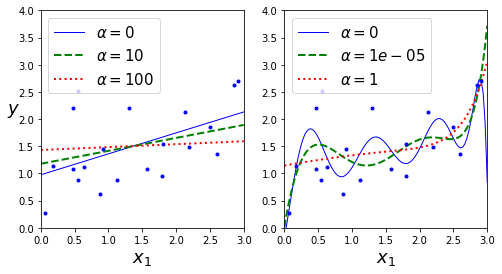

In [8]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        # 岭回归如果alpha为0，就变成了线性回归
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression() 
        # 多项式岭回归
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

### 1.1.1 Sklearn 实现

[sklearn.linear_model.Ridge](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge):

``` Python
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)

ridge_reg.fit(X, y)
ridge_reg.predict([[X_pred]])
```

In [15]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [16]:
ridge_reg.intercept_, ridge_reg.coef_

(array([1.00650911]), array([[0.36280369]]))

与原回归模型 $y = 1 + 0.5 \times X + \varepsilon$ 很接近。

***

### 1.1.2 Ridge + SDG

利用[随机梯度下降](https://blog.csdn.net/weixin_45488228/article/details/99506171)来求解岭回归。

#### 1.1.2.1 Sklearn 实现

In [23]:
from sklearn.linear_model import SGDRegressor

ridge_sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l2", random_state=42)
ridge_sgd_reg.fit(X, y.ravel())
ridge_sgd_reg.predict([[1.5]])

array([1.49905184])

In [24]:
ridge_sgd_reg.intercept_, ridge_sgd_reg.coef_

(array([0.63725132]), array([0.57453367]))

## 1.2 Lasso Regression（L1）

线性回归的另一种正则化，叫作*最小绝对收缩和选择算子回归*（Least Absolute Shrinkage and Selection Operator Regression，简称`Lasso 回归`，或套索回归）。与岭回归一样，它也是像成本函数添加一个正则项，但是它增加的是**权重向量的 $L_1$ 范数**，而不是 $L_2$ 范数的平方的一半。

**Lasso 回归成本函数：**

$$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^n|\theta_i| \tag{3}$$

图 3 显示内容与图 2 相同，但是岭回归模型换成了 Lasso 回归模型，同时 $\alpha$ 值较小。

Lasso 回归的一个重要特点是它倾向于**完全消除掉最不重要特征的权重**（也就是将它们设置为零）。例如，在图 3 中右图中的虚线（$\alpha=10^{-7}$）看起来像是二次的，快要接近于线性；因为所有高阶多项式的特征权重的等于零。换句话说，Lasso 会回会自动执行特征选择并输出一个系数模型（即只有很少的特征有非零权重）。

<center> 图3 不同 $\alpha$ 下的 Lasso 回归 与 多项式 Lasso 回归</center>

代码如下：

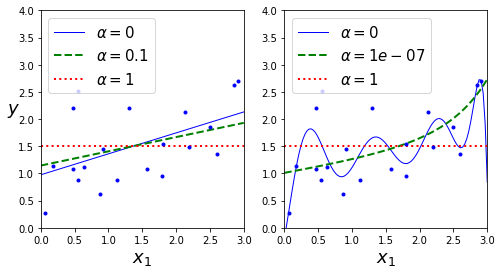

In [7]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

### 1.2.1 Sklearn 实现

[sklearn.linear_model.Lasso](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso):

``` Python
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
lasso_reg.fit(X, y)
lasso_reg.predict([[X_pred]])
```

In [19]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [20]:
lasso_reg.intercept_, lasso_reg.coef_

(array([1.14537356]), array([0.26167212]))

***

### 1.2.2 Lasso + SGD

利用[随机梯度下降](https://blog.csdn.net/weixin_45488228/article/details/99506171)来求解 Lasso 回归，当 $\theta_i=0(i=1,2,\cdots,n)$ ，Lasso 成本函数是不可微的。但是，当任意 $\theta_i=0$ 时，可以使用`次梯度向量` $g$ 作为替代，依旧可以让梯度下降正常运转。

$Lasso$ **回归次梯度向量：**

$$
g(\theta, J)=\nabla_{\theta} \operatorname{MSE}(\theta)+\alpha\left(\begin{array}{c}{\operatorname{sign}\left(\theta_{1}\right)} \\ {\operatorname{sign}\left(\theta_{2}\right)} \\ {\vdots} \\ {\operatorname{sign}\left(\theta_{n}\right)}\end{array}\right) 当sign(\theta_1)=\left\{
\begin{aligned}
-1 \quad (\theta_i<0) \\
0 \quad (\theta_i=0) \\
+1 \quad (\theta_i>0) \\
\end{aligned}
\right.\tag{4}
$$

#### 1.2.2.1 Sklearn 实现

In [22]:
from sklearn.linear_model import SGDRegressor

lasso_sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty="l1", random_state=42)
lasso_sgd_reg.fit(X, y.ravel())
lasso_sgd_reg.predict([[1.5]])

array([1.49903849])

In [25]:
lasso_sgd_reg.intercept_, lasso_sgd_reg.coef_

(array([0.63727982]), array([0.57450578]))

## 1.3 Elastic Net（L1&L2）

`弹性网络`是岭回归与 Lasso 回归之间的中间地带。其正则项就是岭回归和 Lasso 回归的正则项的混合混合比例通过 $r$ (L1_ratio)来控制。当 $r=0$ 时，弹性网络即等同于岭回归，而当 $r=1$ 时，即相当于 Lasso 回归。

**弹性网络成本函数：**

$$J(\theta)=MSE(\theta)+r\alpha \sum_{i=1}^n|\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^n \theta_i^n \tag{5}$$

### 1.3.1 Sklearn 实现

[sklearn.linear_model.ElasticNet](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet):

``` Python
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')[source]

elastic_net.fit(X, y)
elastic_net.predict([[X_pred]])
```

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [27]:
elastic_net.intercept_, elastic_net.coef_

(array([1.08639303]), array([0.30462619]))

## 1.4 正则线性模型选择

应该如何选择线性、岭回归、Lasso 回归和弹性网络呢？通常来说，有正则化——哪怕是很小，总是比没有更可取一些。所以大多数情况下，应该避免使用纯线性回归。

岭回归是个不错的默认选择，但是如果觉得实际用到的特征只有少数几个，那就应该更倾向于 Lasso 回归或是弹性网络，因为它们会将无用特征的权重降为零。

一般而言，弹性网络优于 Lasso 回归，因为当特征数量超过训练实例数量，又或者是几个特征强相关时，Lasso 回归的表现可能非常不稳定。<sup>[1]

# 参考资料

[1] Aurelien Geron, 王静源, 贾玮, 边蕤, 邱俊涛. 机器学习实战：基于 Scikit-Learn 和 TensorFlow[M]. 北京: 机械工业出版社, 2018: 121-127.